## Problem Statement :
 
 * This report presents the development of a prototype AI employee designed to specialize in data analysis and reporting.
 

In [2]:
import pandas as pd

# For a local path or if you've mounted Google Drive
file_path = '/content/drive/MyDrive/help/workong/hiring/olympics2024/Untitled folder/olympics2024.csv'

# Reading the CSV file
df = pd.read_csv(file_path)

# Display the first few rows of the dataframe to verify
print(df.head())


   Rank        Country Country Code  Gold  Silver  Bronze  Total
0     1  United States           US    40      44      42    126
1     2          China          CHN    40      27      24     91
2     3          Japan          JPN    20      12      13     45
3     4      Australia          AUS    18      19      16     53
4     5         France          FRA    16      26      22     64


 1. Data Processing
- Implement a data ingestion module that can handle various file formats (CSV, JSON, Excel)
- Create a data cleaning and preprocessing pipeline


In [3]:
# Step 1: Check for Missing Values
missing_values = df.isnull().sum()
print("Missing Values:")
print(missing_values)

# Step 2: Data Type Validation
data_types = df.dtypes
print("\nData Types:")
print(data_types)

# Step 3: Remove Duplicates (if any)
df_no_duplicates = df.drop_duplicates()

# Step 4: Normalization (Gold medals as a percentage of Total medals)
df_no_duplicates['Gold_Percentage'] = df_no_duplicates['Gold'] / df_no_duplicates['Total']

# Step 5: Feature Engineering (Medal Efficiency)
df_no_duplicates['Medal_Efficiency'] = df_no_duplicates['Total'] / df_no_duplicates['Rank']

# Display the processed DataFrame
print("\nProcessed DataFrame:")
print(df_no_duplicates)

Missing Values:
Rank            0
Country         0
Country Code    0
Gold            0
Silver          0
Bronze          0
Total           0
dtype: int64

Data Types:
Rank             int64
Country         object
Country Code    object
Gold             int64
Silver           int64
Bronze           int64
Total            int64
dtype: object

Processed DataFrame:
    Rank        Country Country Code  Gold  Silver  Bronze  Total  \
0      1  United States           US    40      44      42    126   
1      2          China          CHN    40      27      24     91   
2      3          Japan          JPN    20      12      13     45   
3      4      Australia          AUS    18      19      16     53   
4      5         France          FRA    16      26      22     64   
..   ...            ...          ...   ...     ...     ...    ...   
86    84           Peru          PER     0       0       1      1   
87    84          Qatar          QAT     0       0       1      1   
88    84      

In [4]:
df_no_duplicates

,Rank,Country,Country Code,Gold,Silver,Bronze,Total,Gold_Percentage,Medal_Efficiency
0,1,United States,US,40,44,42,126,0.317460,126.000000
1,2,China,CHN,40,27,24,91,0.439560,45.500000
2,3,Japan,JPN,20,12,13,45,0.444444,15.000000
3,4,Australia,AUS,18,19,16,53,0.339623,13.250000
4,5,France,FRA,16,26,22,64,0.250000,12.800000
...,...,...,...,...,...,...,...,...,...
86,84,Peru,PER,0,0,1,1,0.000000,0.011905
87,84,Qatar,QAT,0,0,1,1,0.000000,0.011905
88,84,Singapore,SIN,0,0,1,1,0.000000,0.011905
89,84,Slovakia,SVK,0,0,1,1,0.000000,0.011905


#2

 2. Analysis Engine
- Develop an analysis engine that can identify key trends and patterns in the data
- Implement at least three different statistical or machine learning algorithms for data analysis


In [5]:
# Descriptive Statistics
print("Descriptive Statistics:")
print(df_no_duplicates.describe())

Descriptive Statistics:
            Rank       Gold     Silver     Bronze       Total  \
count  91.000000  91.000000  91.000000  91.000000   91.000000   
mean   45.307692   3.604396   3.593407   4.219780   11.417582   
std    25.652244   6.990278   6.770816   6.558798   19.702829   
min     1.000000   0.000000   0.000000   0.000000    1.000000   
25%    23.500000   0.000000   0.000000   1.000000    2.000000   
50%    44.000000   1.000000   1.000000   2.000000    5.000000   
75%    68.000000   3.000000   3.000000   5.000000    9.000000   
max    84.000000  40.000000  44.000000  42.000000  126.000000   

       Gold_Percentage  Medal_Efficiency  
count        91.000000         91.000000  
mean          0.264501          2.833997  
std           0.235389         14.127014  
min           0.000000          0.011905  
25%           0.000000          0.036364  
50%           0.250000          0.108108  
75%           0.434066          0.379863  
max           1.000000        126.000000  


In [6]:
# Correlation Matrix
correlation_matrix = df_no_duplicates[['Gold', 'Silver', 'Bronze', 'Total']].corr()
print("\nCorrelation Matrix:")
print(correlation_matrix)



Correlation Matrix:
            Gold    Silver    Bronze     Total
Gold    1.000000  0.910950  0.880670  0.960993
Silver  0.910950  1.000000  0.940045  0.979767
Bronze  0.880670  0.940045  1.000000  0.968379
Total   0.960993  0.979767  0.968379  1.000000


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error

# Features and Target Variable
X = df_no_duplicates[['Gold', 'Silver', 'Bronze']]
y = df_no_duplicates['Total']

# Split the Data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and Train the Model
model = LinearRegression()
model.fit(X_train, y_train)

# Make Predictions
y_pred = model.predict(X_test)

# Evaluate the Model
mse = mean_squared_error(y_test, y_pred)
print("\nMean Squared Error of the Linear Regression Model:")
print(mse)



Mean Squared Error of the Linear Regression Model:
4.6699527614208605e-28


2other algorithm ml

In [21]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error



# Initialize Models
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree Regressor': DecisionTreeRegressor(),
    'K-Nearest Neighbors': KNeighborsRegressor()
}

# Train and Evaluate Models
for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    print(f"\n{name} Mean Squared Error:")
    print(mse)



Linear Regression Mean Squared Error:
4.6699527614208605e-28

Decision Tree Regressor Mean Squared Error:
79.42105263157895

K-Nearest Neighbors Mean Squared Error:
254.59789473684214


#3. Report Generation
- Create a module that can generate comprehensive reports based on the analysis results
- The reports should include visualisations (charts, graphs) and written summaries


In [15]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import Image, display

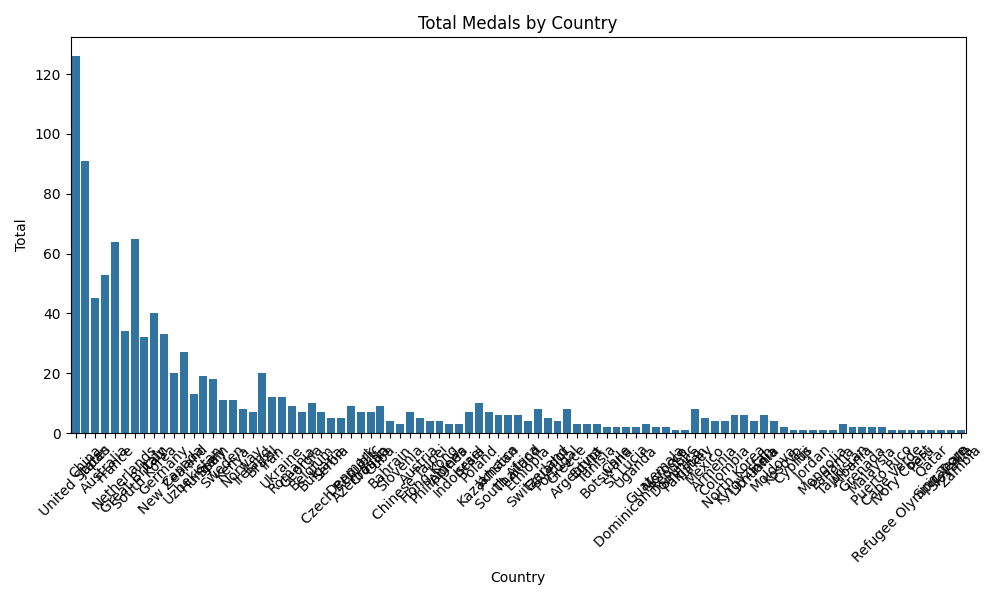

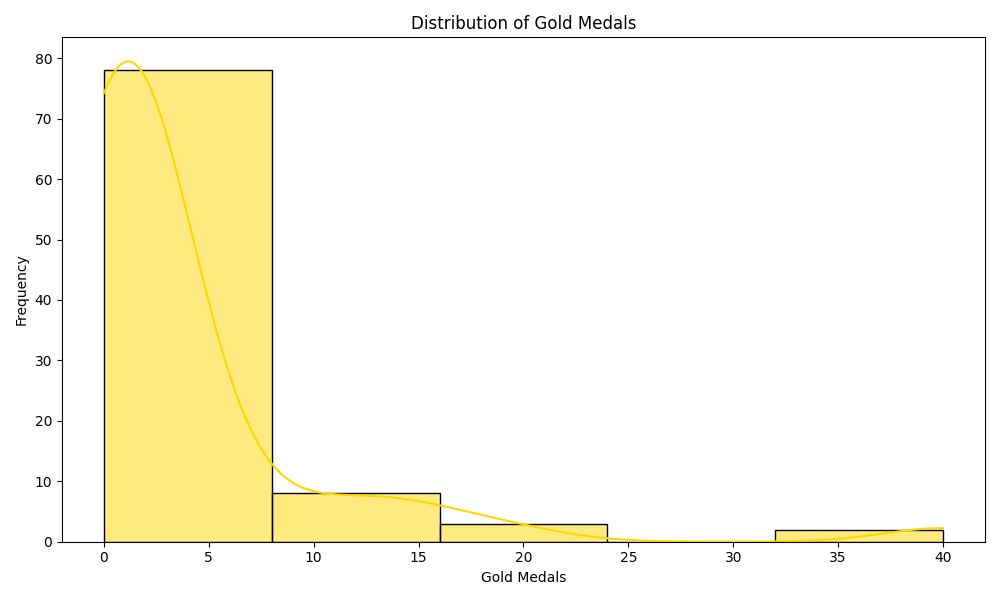

In [19]:
# Total Medals by Country
def plot_total_medals_by_country(df):
    plt.figure(figsize=(10, 6))
    sns.barplot(x='Country', y='Total', data=df, errorbar=None)
    plt.title('Total Medals by Country')
    plt.xticks(rotation=45)
    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig('total_medals_by_country.png')
    plt.close()
    display(Image(filename='total_medals_by_country.png'))

# Gold Medals Distribution
def plot_gold_medals_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Gold'], bins=5, kde=True, color='gold')
    plt.title('Distribution of Gold Medals')
    plt.xlabel('Gold Medals')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig('gold_medals_distribution.png')
    plt.close()
    display(Image(filename='gold_medals_distribution.png'))

# Call the functions to generate and display the plots
plot_total_medals_by_country(df_no_duplicates)
plot_gold_medals_distribution(df_no_duplicates)

In [17]:
# Silver Medals Distribution
def plot_Silver_medals_distribution(df):
    plt.figure(figsize=(10, 6))
    sns.histplot(df['Silver'], bins=5, kde=True, color='gold')
    plt.title('Distribution of Silver Medals')
    plt.xlabel('Silver Medals')
    plt.ylabel('Frequency')
    plt.tight_layout()  # Adjust layout to fit labels
    plt.savefig('Silver_medals_distribution.png')
    plt.close()
    display(Image(filename='Silver_medals_distribution.png'))

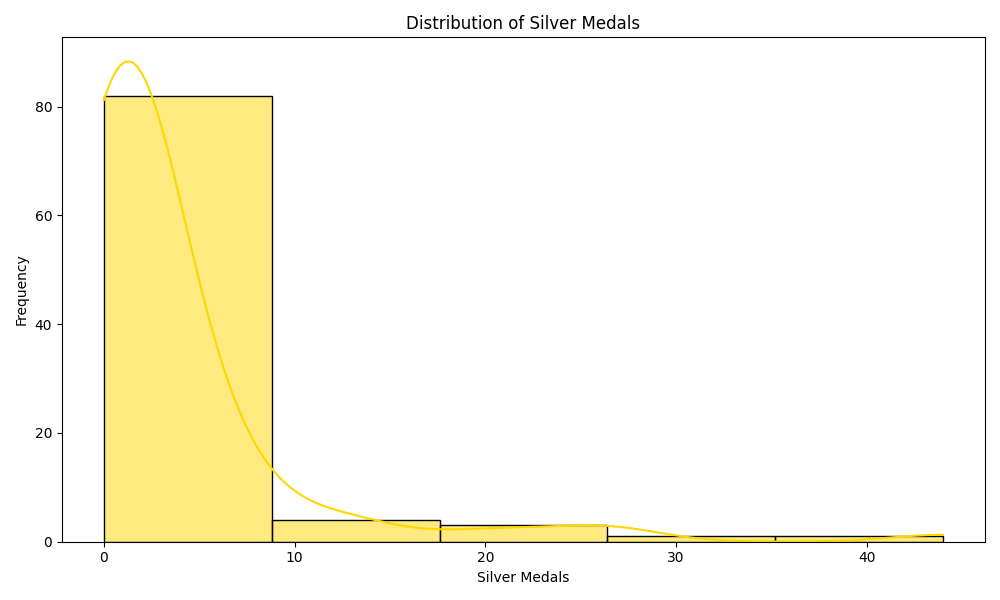

In [18]:
plot_Silver_medals_distribution(df_no_duplicates)